In [ ]:
!pip install neo4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.0/198.0 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for neo4j: filename=neo4j-5.18.0-py3-none-any.whl size=273862 sha256=c013d1aecd1bbd6a253a1bdd384b0f884bc673dcb5732db3fdd8d35d22522f4f
  Stored in directory: /root/.cache/pip/wheels/e7/e1/a0/dd7c19192f5383ff57d02a6c126cbfe4b7b2ae82f70c6994ce
Successfully built neo4j


In [ ]:
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-f7_m7ujq
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-f7_m7ujq
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done
  Created wheel for stellargraph: filename=stellargraph-1.3.0b0-py3-none-any.whl size=431845 sha256=3c909420802a238977aa6859e1c8f4159f11579f1c69c7a32107dd41db2f1a5a
  Stored in directory: /tmp/pip-ephem-wheel-cache-e24n2mdl/wheels/f3/06/0f/089f69af27d308a1830638f855b6c5755311d8ffc451de9980
Successfully built stellargraph



The pip install git+https://github.com/VenkateshwaranB/stellargraph.git command installs the stellargraph library directly from its GitHub repository using the pip package manager. This method allows you to obtain the latest code directly from the repository rather than from the Python Package Index (PyPI).

In [ ]:
!pip install neo4j stellargraph torch dgl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 19.4 MB/s eta 0:00:00


The command pip install neo4j stellargraph torch dgl installs the specified Python packages (neo4j, stellargraph, torch, and dgl) using the pip package manager. This is a convenient way to install multiple packages in one command.

In [ ]:
!pip install stellargraph py2neo pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.2/177.2 kB 3.9 MB/s eta 0:00:00



The command pip install stellargraph py2neo pandas installs the specified Python packages (stellargraph, py2neo, and pandas) using the pip package manager. This enables you to install these libraries and their dependencies in your Python environment.

In [ ]:
# Importing the GraphDatabase class from the neo4j module
from neo4j import GraphDatabase

# Neo4j database connection details
uri = "neo4j+s://d3a947d5.databases.neo4j.io"
username = "neo4j"
password = "SC3NYzP1w2IG2JfYgFqgaDq-BfB66uVZ4j6bOEMx7ik"

# Creating a Neo4j driver instance with authentication
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to extract graph data from Neo4j database
def extract_graph_data(tx):
    query = (
        "MATCH (n)-[r]->(m) "
        "RETURN id(n) AS source, id(m) AS target, type(r) AS relationship"
    )
    result = tx.run(query)
    # Extracting and formatting the result into a list of tuples
    return [(record["source"], record["target"], record["relationship"]) for record in result]

# Opening a session with the Neo4j driver
with driver.session() as session:
    # Executing the graph data extraction function within a read transaction
    graph_data = session.read_transaction(extract_graph_data)

# Closing the Neo4j driver connection
driver.close()

In [ ]:
import stellargraph as sg
import numpy as np
from py2neo import Graph
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from stellargraph.mapper import GraphSAGENodeGenerator
from stellargraph.layer import GraphSAGE
from tensorflow import keras

# Connect to your Neo4j instance using py2neo
graph = Graph("neo4j+s://d3a947d5.databases.neo4j.io", auth=("neo4j", "SC3NYzP1w2IG2JfYgFqgaDq-BfB66uVZ4j6bOEMx7ik"))

# Cypher query to fetch node features and relationships
query = """
MATCH (n)-[r]->(m)
RETURN id(n) AS source, id(m) AS target, type(r) AS relationship
"""
result = graph.run(query)

# Convert result to a Pandas DataFrame
df = pd.DataFrame(result.data())

In [ ]:
# Importing the Deep Graph Library (DGL)
import dgl

# Extracting source, destination, and relationship from the graph_data
src, dst, rel = zip(*graph_data)


In [ ]:
# Importing the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder instance
le = LabelEncoder()

# Transforming the 'rel' (relationship) data to numerical labels
rel = le.fit_transform(rel)

In [ ]:
df['relationship']= le.fit_transform(df['relationship'])

In [ ]:
src=pd.DataFrame(src)
rel=pd.DataFrame(rel)

Stellargraph is a Python library tailored for machine learning on graph-structured data, offering tools and algorithms for tasks like node classification, link prediction, and graph classification. Built on TensorFlow and Keras, Stellargraph supports the creation and manipulation of heterogeneous graphs, making it versatile for real-world scenarios. The library integrates seamlessly with deep learning frameworks, providing access to popular graph algorithms such as GraphSAGE and node2vec. With its flexibility and compatibility with both homogeneous and heterogeneous graphs, Stellargraph is a powerful resource for diverse applications across social networks, biology, and recommendation systems. Its user-friendly design allows for easy customization and extension to address specific needs, contributing to its popularity in the graph-based machine learning community.





In [ ]:
import stellargraph as sg
import tensorflow as tf
from sklearn.model_selection import train_test_split
# convert the raw data into StellarGraph's graph format for faster operations
graph = sg.StellarGraph(src,df)

Using GCN (local pooling) filters...


The train_test_split function from scikit-learn's model_selection module to split a dataframe (df) into training and testing sets for a graph-based machine learning task. The train_size and test_size parameters determine the proportions allocated for training and testing, respectively. The resulting edgelist_train and edgelist_test are lists of tuples representing the edges in the training and testing sets, while labels_train and labels_test store the corresponding relationship labels for the edges in the training and testing sets. This code is essential for preparing data in a supervised learning context, ensuring that the model is trained on a subset of edges and tested on another subset to assess its generalization performance.

In [ ]:
edges_train, edges_test = model_selection.train_test_split(
    df, train_size=train_size, test_size=test_size
)

edgelist_train = list(edges_train[["source", "target"]].itertuples(index=False))
edgelist_test = list(edges_test[["source", "target"]].itertuples(index=False))

labels_train = edges_train["relationship"]
labels_test = edges_test["relationship"]

In [ ]:
num_samples = [8, 4]

HinSAGELinkGenerator is a class in the Stellargraph library designed for link prediction tasks on heterogeneous graphs. The term "HinSAGE" refers to the Heterogeneous GraphSAGE, a variant of the GraphSAGE algorithm adapted for heterogeneous graphs. The HinSAGELinkGenerator facilitates the generation of link prediction mini-batches, allowing the efficient training of GraphSAGE models on pairs of nodes from different types connected by edges. It handles the sampling and batching of node neighborhoods and the creation of negative samples for training. This class is particularly useful for preserving the structural and semantic information in heterogeneous graphs during the link prediction process, enabling the model to learn meaningful representations for different types of nodes and relationships in the graph.

In [ ]:
generator = HinSAGELinkGenerator(
    graph, batch_size, num_samples
)
train_gen = generator.flow(edgelist_train, labels_train, shuffle=True)
test_gen = generator.flow(edgelist_test, labels_test)

In [ ]:
# Obtain the type adjacency list for the specified head node types and number of samples
type_adjacency_list = generator.schema.type_adjacency_list(generator.head_node_types, len(num_samples))

[('default', [2]),
 ('default', [3]),
 ('default', [4]),
 ('default', [5]),
 ('default', []),
 ('default', [])]

In [ ]:
# Ensure that the specified Heterogeneous GraphSAGE (HinSAGE) layer sizes match the number of samples
assert len(hinsage_layer_sizes) == len(num_samples)

# Initialize the HinSAGE layer with the specified layer sizes, generator, bias, and dropout
hinsage = HinSAGE(layer_sizes=hinsage_layer_sizes, generator=generator, bias=True, dropout=0.0)

In [ ]:
# Extract input and output tensors from the HinSAGE layer
x_inp, x_out = hinsage.in_out_tensors()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
# Perform link prediction by applying a regression layer to the output tensor from HinSAGE
score_prediction = link_regression(edge_embedding_method="concat")(x_out)

link_regression: using 'concat' method to combine node embeddings into edge embeddings


link regression layer to predict scores for link existence based on the embeddings generated by the HinSAGE layer. The edge_embedding_method="concat" parameter specifies the method used to combine node embeddings when predicting link scores, in this case, concatenating the embeddings of the source and target nodes. This step is crucial for transforming the node embeddings into a prediction score, often followed by a loss calculation during the training process.

In [ ]:
import tensorflow.keras.backend as K


def root_mean_square_error(s_true, s_pred):
    return K.sqrt(K.mean(K.pow(s_true - s_pred, 2)))


# Compile the model with Adam optimizer, mean squared error loss, and evaluation metrics
model.compile(
    optimizer=optimizers.Adam(lr=1e-2),
    loss=losses.mean_squared_error,
    metrics=[root_mean_square_error, metrics.mae],
)

First, a neural network model is defined with x_inp as the input tensor and score_prediction as the output tensor, representing the link prediction scores. Next, the model is compiled using the Adam optimizer with a learning rate of 1e-2, mean squared error as the loss function for training, and additional evaluation metrics, including the root mean square error (root_mean_square_error) and mean absolute error (metrics.mae).

In [ ]:
# Specify the number of workers to use for model training
num_workers = 4

In [ ]:
# Evaluate the untrained model on the test set
test_metrics = model.evaluate(
    test_gen, verbose=1, use_multiprocessing=False, workers=num_workers
)

# Print the evaluation metrics for the untrained model on the test set
print("Untrained model's Test Evaluation:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

39/39 [==============================] - 11s 175ms/step - loss: 41.1663 - root_mean_square_error: 6.4119 - mean_absolute_error: 5.3800
Untrained model's Test Evaluation:
	loss: 41.1663
	root_mean_square_error: 6.4119
	mean_absolute_error: 5.3800


Firstly, the evaluate method is applied to the model (model) using the test generator (test_gen). The evaluation metrics are stored in the test_metrics variable. The subsequent code prints out the evaluation metrics for the untrained model on the test set. This is valuable for understanding the initial performance of the model before any training has occurred.

In [ ]:
# Train the model using the training generator and evaluate on the validation set
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=epochs,
    verbose=1,
    shuffle=False,
    use_multiprocessing=False,
    workers=num_workers,
)

Epoch 1/20
91/91 [==============================] - 24s 230ms/step - loss: 29.1013 - root_mean_square_error: 5.3706 - mean_absolute_error: 4.1906 - val_loss: 23.2080 - val_root_mean_square_error: 4.8126 - val_mean_absolute_error: 3.5276
Epoch 2/20
91/91 [==============================] - 20s 213ms/step - loss: 19.2968 - root_mean_square_error: 4.3850 - mean_absolute_error: 3.3009 - val_loss: 17.4281 - val_root_mean_square_error: 4.1700 - val_mean_absolute_error: 3.2840
Epoch 3/20
91/91 [==============================] - 19s 211ms/step - loss: 15.2498 - root_mean_square_error: 3.8991 - mean_absolute_error: 3.1669 - val_loss: 14.4231 - val_root_mean_square_error: 3.7935 - val_mean_absolute_error: 3.1891
Epoch 4/20
91/91 [==============================] - 19s 211ms/step - loss: 13.1643 - root_mean_square_error: 3.6249 - mean_absolute_error: 3.1039 - val_loss: 12.8740 - val_root_mean_square_error: 3.5844 - val_mean_absolute_error: 3.1351
Epoch 5/20
91/91 [==============================] - 

 The fit method is applied to the model (model) with training data from train_gen and validation data from test_gen. The epochs parameter determines the number of training epochs, and other optional parameters include verbosity (verbose), shuffling of training data (shuffle), and the number of workers for data loading (workers). The training history, including metrics and losses for each epoch, is stored in the history variable.

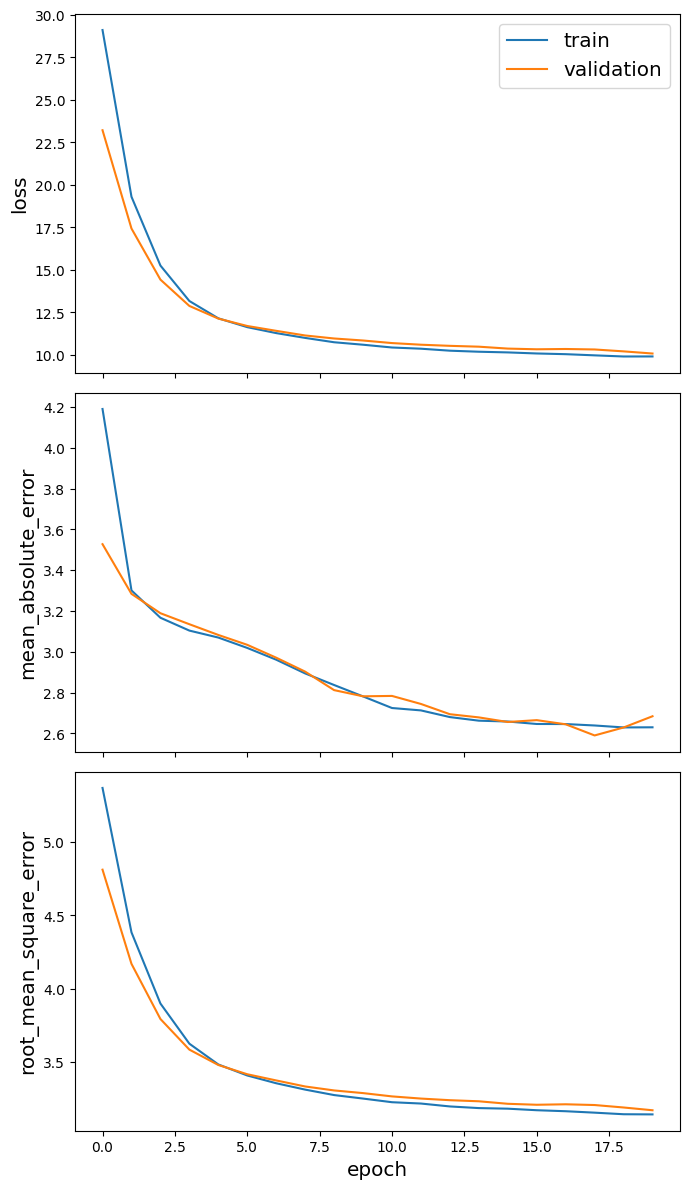

In [ ]:
sg.utils.plot_history(history)

In [ ]:
test_metrics = model.evaluate(
    test_gen, use_multiprocessing=False, workers=num_workers, verbose=1
)

print("Test Evaluation:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

39/39 [==============================] - 6s 134ms/step - loss: 10.1037 - root_mean_square_error: 3.1742 - mean_absolute_error: 2.6846
Test Evaluation:
	loss: 10.1037
	root_mean_square_error: 3.1742
	mean_absolute_error: 2.6846


In [ ]:
y_true = labels_test
# Predict the rankings using the model:
y_pred = model.predict(test_gen)
# Mean baseline rankings = mean movie ranking:
y_pred_baseline = np.full_like(y_pred, np.mean(y_true))

rmse = np.sqrt(mean_squared_error(y_true, y_pred_baseline))
mae = mean_absolute_error(y_true, y_pred_baseline)
print("Mean Baseline Test set metrics:")
print("\troot_mean_square_error = ", rmse)
print("\tmean_absolute_error = ", mae)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("\nModel Test set metrics:")
print("\troot_mean_square_error = ", rmse)
print("\tmean_absolute_error = ", mae)

39/39 [==============================] - 6s 124ms/step
Mean Baseline Test set metrics:
	root_mean_square_error =  3.4919327541064353
	mean_absolute_error =  3.2115590100304954

Model Test set metrics:
	root_mean_square_error =  3.1813338794058152
	mean_absolute_error =  2.6885148664553253


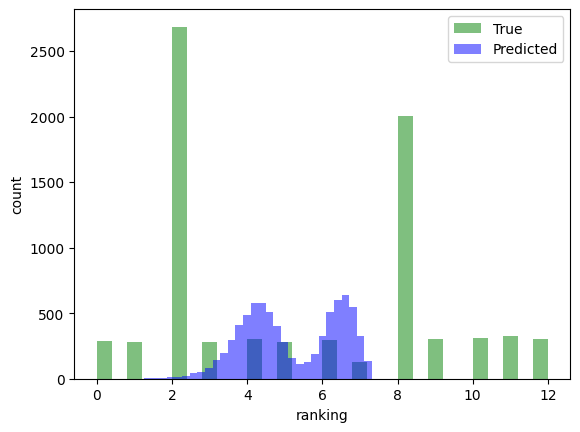

In [ ]:
h_true = plt.hist(y_true, bins=30, facecolor="green", alpha=0.5)
h_pred = plt.hist(y_pred, bins=30, facecolor="blue", alpha=0.5)
plt.xlabel("ranking")
plt.ylabel("count")
plt.legend(("True", "Predicted"))
plt.show()

Running Code Ends